In [119]:
# This Notebook will serve solely for data esploration 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing.csv')

df = pd.read_csv("housing.csv")

In [121]:
data.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [122]:
#Checking for null values
data.info()

#Dropping said Null values
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [123]:
# Defining the 2 data sets 
# then fusing the 2 training set separately from the test samples

from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)



train_data= X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

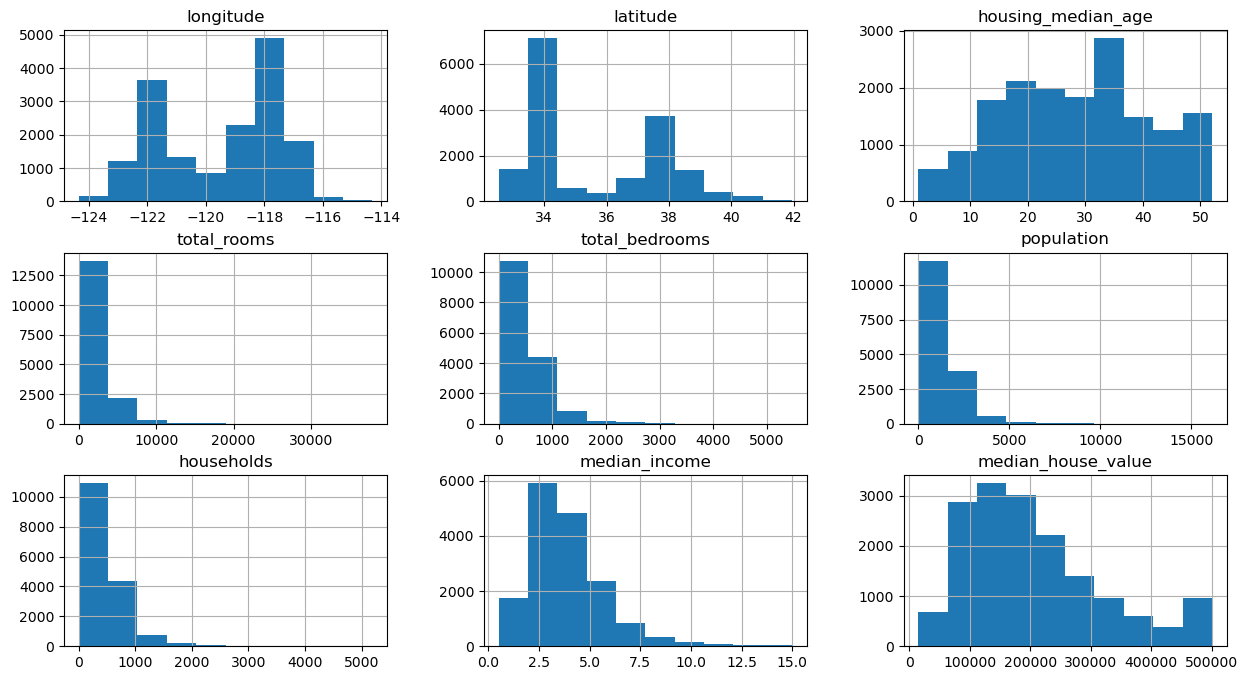

In [124]:
train_data.hist(figsize=(15,8))

In [125]:
# Data for total_rooms / total_bedrooms / population / household is definetly skewed

In [126]:
# After checking for the distribution of our data we want to havea look to any possible correlation
# Checking for any significant correlation avoiding the any non numerical data piece

train_data.select_dtypes(include=['number']).corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924514,-0.111809,0.047469,0.072096,0.105181,0.058434,-0.015611,-0.048189
latitude,-0.924514,1.000000,0.014567,-0.036020,-0.066641,-0.111260,-0.070765,-0.079192,-0.141384
housing_median_age,-0.111809,0.014567,1.000000,-0.364607,-0.322857,-0.306805,-0.306700,-0.120686,0.106224
total_rooms,0.047469,-0.036020,-0.364607,1.000000,0.927803,0.861696,0.916954,0.200319,0.135418
total_bedrooms,0.072096,-0.066641,-0.322857,0.927803,1.000000,0.882888,0.979642,-0.010966,0.048780
population,0.105181,-0.111260,-0.306805,0.861696,0.882888,1.000000,0.912007,0.007734,-0.023175
households,0.058434,-0.070765,-0.306700,0.916954,0.979642,0.912007,1.000000,0.011172,0.065189
median_income,-0.015611,-0.079192,-0.120686,0.200319,-0.010966,0.007734,0.011172,1.000000,0.687940
median_house_value,-0.048189,-0.141384,0.106224,0.135418,0.048780,-0.023175,0.065189,0.687940,1.000000


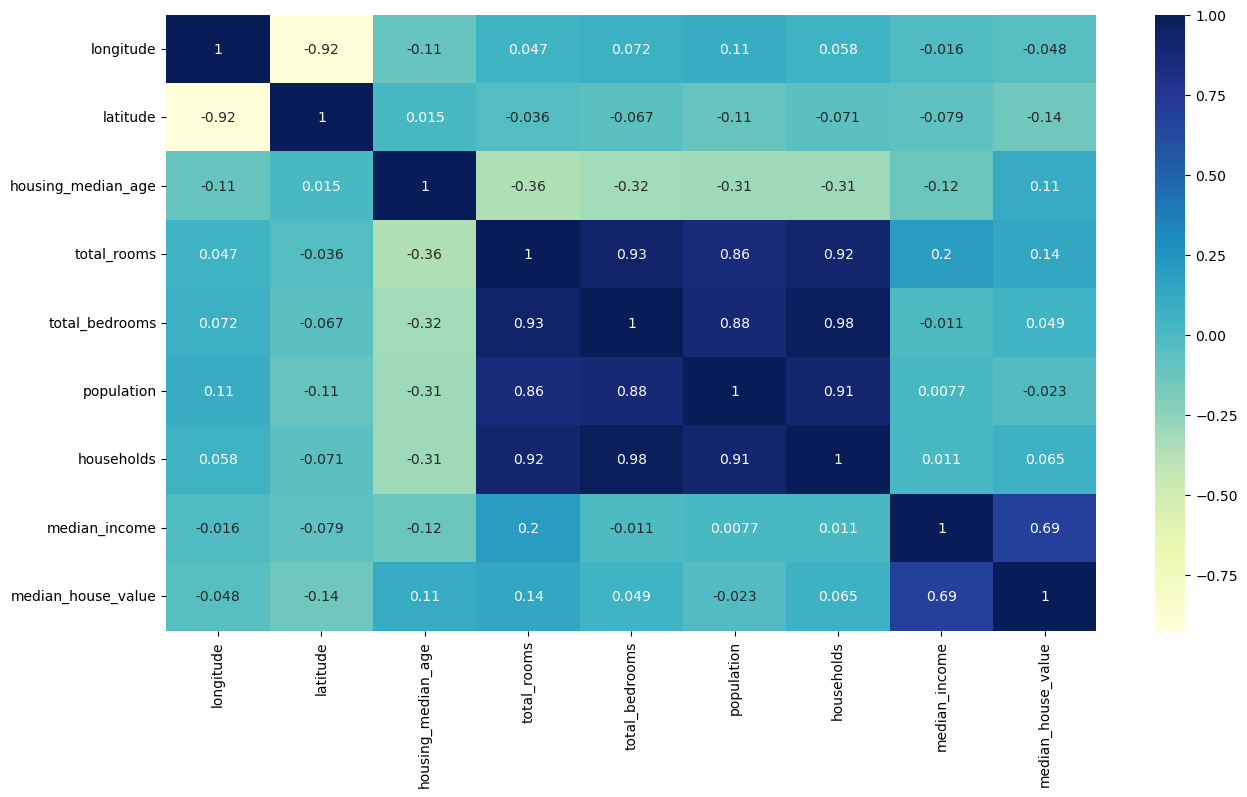

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
numeric_corr = train_data.select_dtypes(include=['number']).corr()  # numeric-only
sns.heatmap(numeric_corr, annot=True, cmap="YlGnBu")               # use numeric_corr here
plt.show()

# The original attempt to calculate correlation failed because train_data contains
# non-numeric columns (like strings), which pandas can't convert to floats for correlation.
# So, we first select only the numeric columns with select_dtypes(include=['number']),
# then calculate correlation on that subset. This avoids the error and lets us
# plot the heatmap correctly using only numeric data.


In [128]:
#Finding possible strong correlation, 
# Data is pointing at median income as a strong predictor for Median house value

In [129]:
# Since some of the previously displayed data is skewed and our model is based on linear regression
#  we do want a bell curve distribution of previously mentioned skewed variables

# using the np.log fnuction will allow us to redimension our dataset for said variables 
# Adding (+1) is to avoid a the log function breaking in case of 0 values

train_data ["total_rooms"] = np.log(train_data['total_rooms'] + 1 )
train_data ["total_bedrooms"] = np.log(train_data['total_bedrooms'] + 1 )
train_data ["population"] = np.log(train_data['population'] + 1 )
train_data ["households"] = np.log(train_data['households'] + 1 )

In [130]:
# about the ocean proximity variable we need to transform said values 
# in such way to be implemented by our system

print(train_data.ocean_proximity.value_counts())


ocean_proximity
<1H OCEAN     7202
INLAND        5189
NEAR OCEAN    2133
NEAR BAY      1817
ISLAND           5
Name: count, dtype: int64


In [131]:
# Instead of assigning numbers to each one of this uncountable data 
# we'll add said variables to our dataset by implementing a binary system where all data rows will
# either diplay 1 in case said variable is true for a particular row: 

pd.get_dummies(train_data.ocean_proximity, dtype=int)

# dtype=int is used to display an actual binary output

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
638,0,0,0,1,0
9740,1,0,0,0,0
8631,1,0,0,0,0
7552,1,0,0,0,0
13419,0,1,0,0,0
...,...,...,...,...,...
17789,1,0,0,0,0
15224,0,0,0,0,1
16746,0,0,0,0,1
2923,0,1,0,0,0


In [132]:
# Now we want to join the dummies to our dataset 

train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int))

# and drop the ocean proximity column entirely

train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
638,-122.15,37.72,31.0,7.388328,5.921578,6.606650,5.940171,2.9097,210900.0,0,0,0,1,0
9740,-121.64,36.74,30.0,7.874359,6.098074,7.224753,6.070738,4.1696,175000.0,1,0,0,0,0
8631,-118.40,33.88,36.0,8.014005,6.180017,7.153834,6.204558,7.2651,500001.0,1,0,0,0,0
7552,-118.18,33.91,41.0,7.139660,5.703782,7.336937,5.777652,3.0134,128100.0,1,0,0,0,0
13419,-117.50,34.04,5.0,8.283747,6.501290,7.806696,6.502790,5.1647,154700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17789,-121.83,37.35,31.0,7.977625,6.573680,8.174139,6.470800,3.7143,178600.0,1,0,0,0,0
15224,-117.26,33.05,14.0,7.751045,5.924256,6.964136,5.921578,6.2513,240900.0,0,0,0,0,1
16746,-122.46,37.70,37.0,6.936343,5.620401,6.807935,5.568345,3.5035,238600.0,0,0,0,0,1
2923,-119.03,35.36,41.0,7.844633,6.388561,7.202661,6.390241,1.9671,76800.0,0,1,0,0,0


In [133]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

<Axes: >

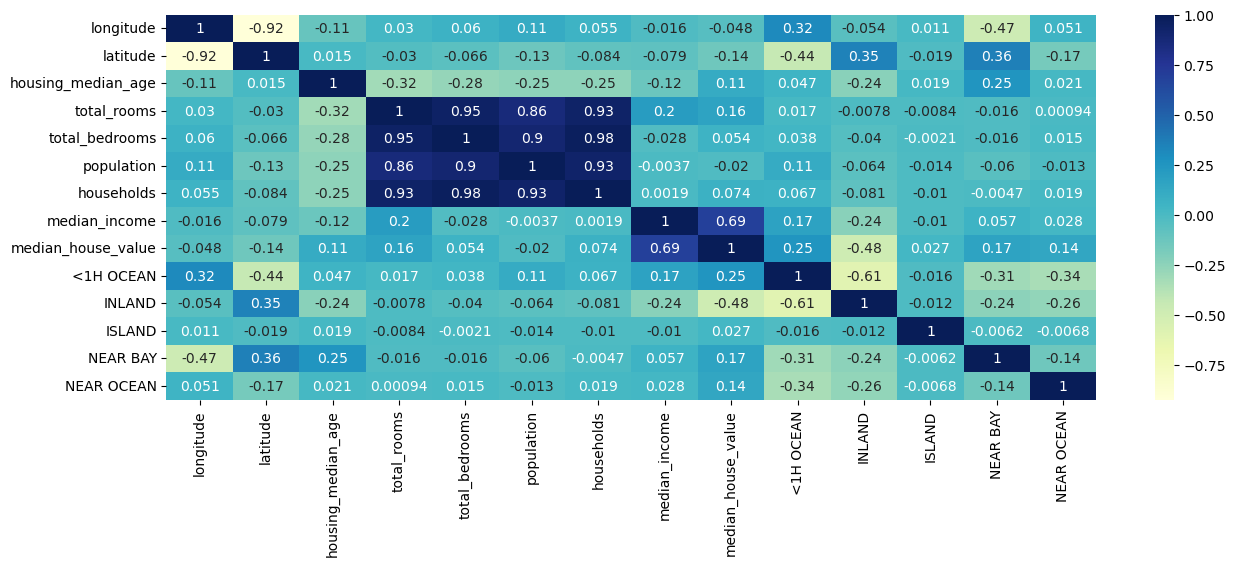

In [134]:
# back to some data exploration we want now to see how 
# the new renowed variable is correlated to other variables

plt.figure(figsize=(15,5))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [135]:
# we now notice that we have a negative correlation for the INLAND / MEDIAN_HOUSE_VALUE variables
# and a positive correlation for the <1H OEAN / MEDIAN_HOUSE_VALUE variables

<Axes: xlabel='latitude', ylabel='longitude'>

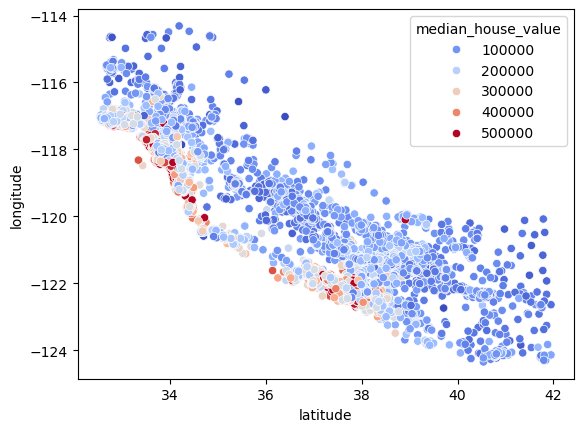

In [136]:
# We are now going to check for any other insight focusing on the exact real estates location's  
# based on longitude and latitude attributes

plt.Figure(figsize=(15,10))

sns.scatterplot(x='latitude', y='longitude', 
                data=train_data, hue="median_house_value", 
                palette='coolwarm')

# SNS may not be best for displaying changes in prices but it sure creates contrast and help data exploration,
# hence we can notice right away how the vicinity to the coast seems to inflate esatates prices


In [137]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
638,-122.15,37.72,31.0,7.388328,5.921578,6.606650,5.940171,2.9097,210900.0,0,0,0,1,0
9740,-121.64,36.74,30.0,7.874359,6.098074,7.224753,6.070738,4.1696,175000.0,1,0,0,0,0
8631,-118.40,33.88,36.0,8.014005,6.180017,7.153834,6.204558,7.2651,500001.0,1,0,0,0,0
7552,-118.18,33.91,41.0,7.139660,5.703782,7.336937,5.777652,3.0134,128100.0,1,0,0,0,0
13419,-117.50,34.04,5.0,8.283747,6.501290,7.806696,6.502790,5.1647,154700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17789,-121.83,37.35,31.0,7.977625,6.573680,8.174139,6.470800,3.7143,178600.0,1,0,0,0,0
15224,-117.26,33.05,14.0,7.751045,5.924256,6.964136,5.921578,6.2513,240900.0,0,0,0,0,1
16746,-122.46,37.70,37.0,6.936343,5.620401,6.807935,5.568345,3.5035,238600.0,0,0,0,0,1
2923,-119.03,35.36,41.0,7.844633,6.388561,7.202661,6.390241,1.9671,76800.0,0,1,0,0,0


In [138]:
# Moving on to feature engineering:
# An interesting information would be the ratio of bedrooms for number of rooms... 
# to later check if there is a correlation between "overcrowded areas" and median house value
# to do this we'd want to get a "ratio" of these 2 variables by deviding total bedrooms by total rooms

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

# to also understand how many rooms the usual household has 
# we'd want to divide the total rooms by the total households

train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


# other interesting feature would also be features to see how overcrowded an area actually is :

train_data["overcrowding_ratio"] = train_data["population"] / train_data["households"]


<Axes: >

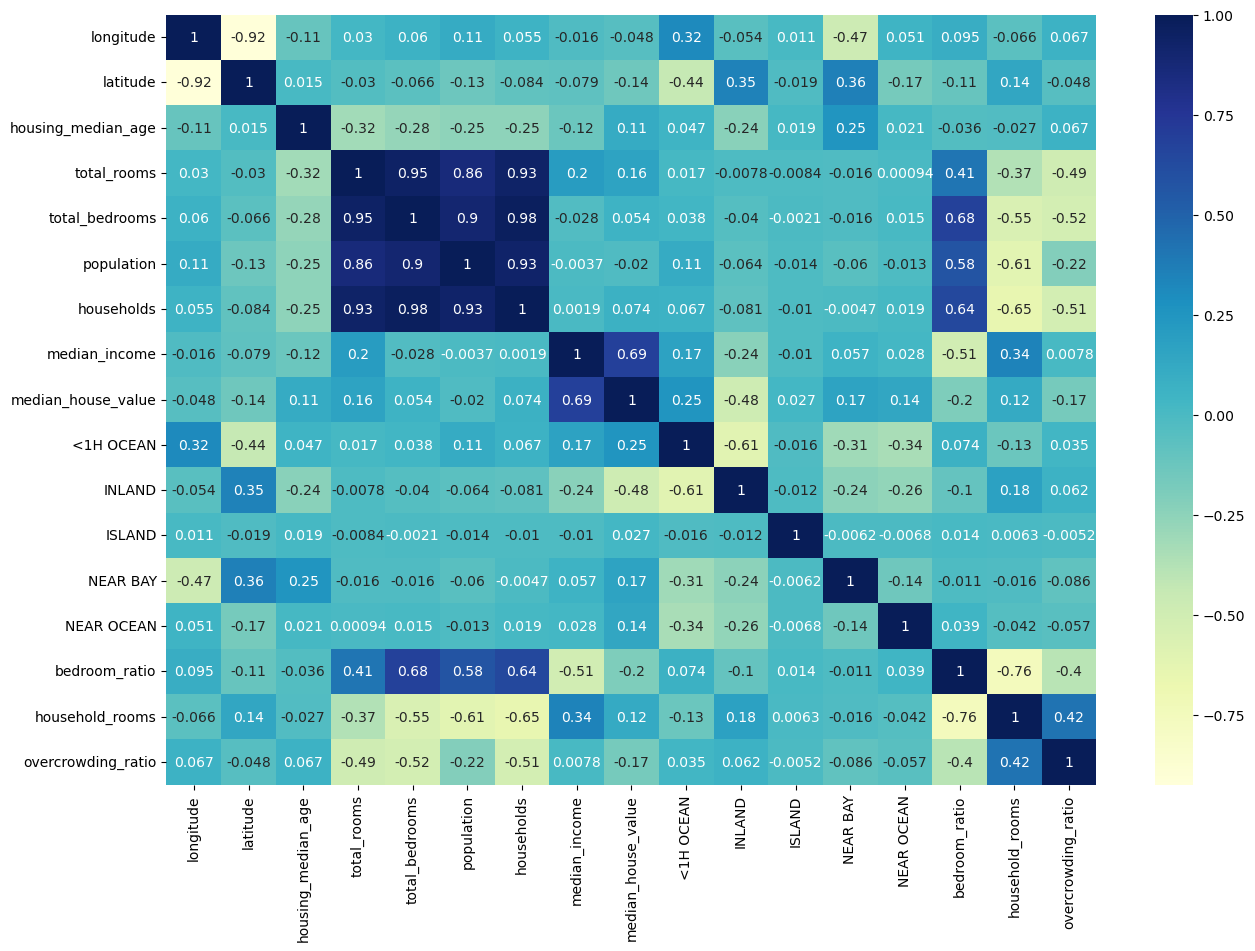

In [139]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

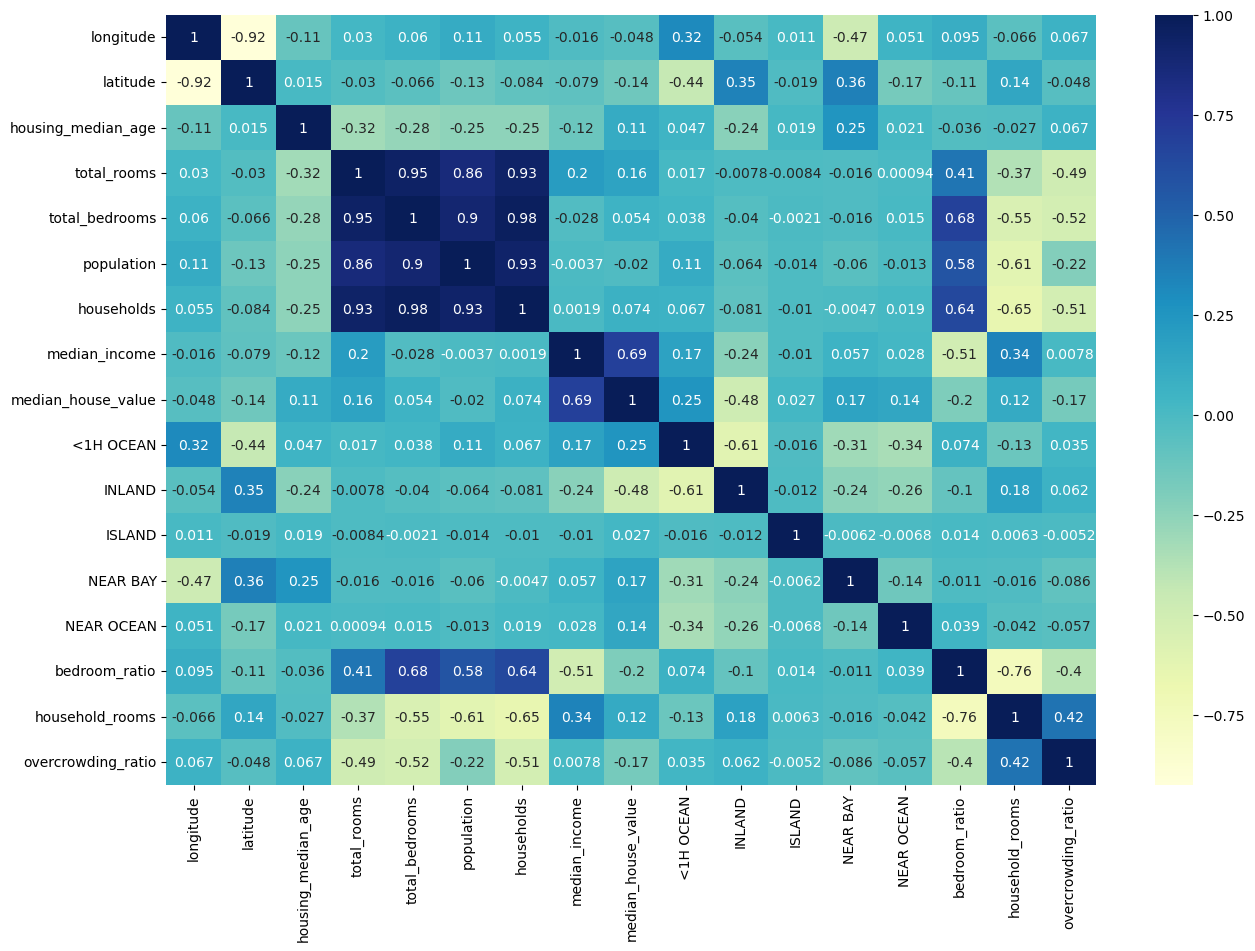

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [141]:
# Creating the first model through linear regression

# Yet we added our new features so we have to split the data again

from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data ['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [142]:
test_data= X_test.join(y_test)

test_data ["total_rooms"] = np.log(test_data['total_rooms'] + 1 )
test_data ["total_bedrooms"] = np.log(test_data['total_bedrooms'] + 1 )
test_data ["population"] = np.log(test_data['population'] + 1 )
test_data ["households"] = np.log(test_data['households'] + 1 )

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
test_data["overcrowding_ratio"] = test_data["population"] / test_data["households"]

In [146]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data ['median_house_value']

#Overcoming the missing island column die to binary code with reindex

X_test = X_test.reindex(columns=x_train.columns, fill_value=0)


In [147]:
reg.score (X_test, y_test)

0.6789225504021644